# Lead Score Case Study: Logistic regression model
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

## Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')


# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_columns', None)

## Import Data set

In [2]:
lead_data=pd.read_csv("C:\DataScienceUpgrad\Main Course\Course 3-Machine Learning I\Group Case Study 1\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the Dataframe

In [3]:
# Let's check the dimension of dataframe
lead_data.shape

(9240, 37)

In [4]:
# Let's look at the statistical aspect of the data frame
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Cleaning

### Dropping redundant columns

In [6]:
# Now Let's drop redundant columns
# 'Prospect ID','Lead Number' are unique id for row which is not required in logistic regression model
# 'Country' and 'City' has no role in deciding prospecting lead for e education platform.
# 'Lead Quality' column indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.Any way we are going to capture this information through modelling via providing lead score so i think it is irrelevent we can drop it.

redundant_col=['Prospect ID','Lead Number','Country','City','Lead Quality']
lead_data=lead_data.drop(redundant_col, axis=1)
lead_data.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Dropping no variance columns

In [7]:
categorical_col=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
      'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

lead_data[categorical_col].describe()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9137,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,9240,9240,6531,5022,5022,9240,9240,9240
unique,5,21,2,2,17,19,10,6,3,2,1,2,2,2,2,2,1,26,1,1,6,3,3,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,02.Medium,02.Medium,No,No,Modified
freq,4886,2868,8506,9238,3437,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,9240,9240,4146,3839,2788,9240,6352,3407


In [8]:
no_variance_col=['Do Not Call','What matters most to you in choosing a course','Magazine','Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
# no variance means no information so we can drop them 

lead_data=lead_data.drop(no_variance_col, axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Tags,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,Interested in other courses,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,Ringing,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,No,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,Ringing,Select,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,Will revert after reading the email,Select,02.Medium,01.High,15.0,18.0,No,Modified


### Treating missing value

In [9]:
# There are many columns in which some values are Select.This is equivalent to null as user would not have selected any option from the given drop down during filling the form so it captured as it is like Select
# Let's replace Select with NaN
lead_data.replace('Select', np.nan, inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Tags,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,No,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,No,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,No,Will revert after reading the email,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,Ringing,NaN,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,No,Will revert after reading the email,NaN,02.Medium,01.High,15.0,18.0,No,Modified


In [10]:
# Let's check % of missing values in each column
((lead_data.isna().mean()*100).round(2)).sort_values(ascending=False)

How did you hear about X Education        78.46
Lead Profile                              74.19
Asymmetrique Profile Score                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Index               45.65
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
Last Notable Activity                      0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Search                                     0.00
Lead Origin                                0.00
dtype: float64

In [11]:
# columns 'How did you hear about X Education','Lead Profile' have more than 60% null values. Let's drop them
lead_data.drop(['How did you hear about X Education','Lead Profile'], axis=1, inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,Interested in other courses,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,Ringing,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Will revert after reading the email,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Ringing,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,Will revert after reading the email,02.Medium,01.High,15.0,18.0,No,Modified


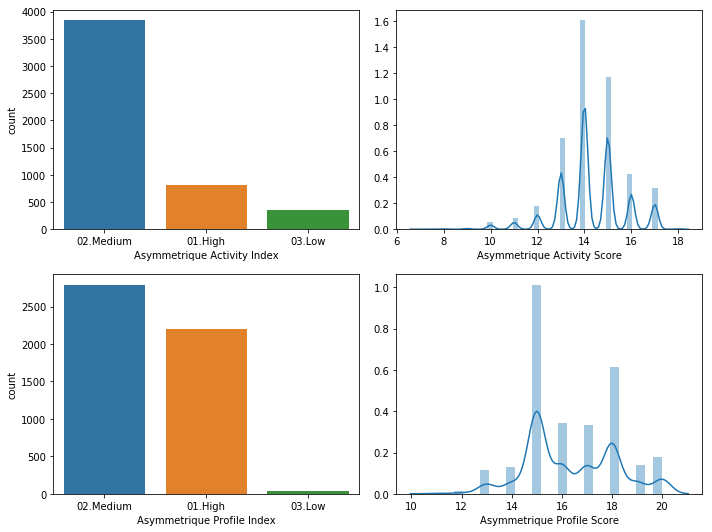

In [12]:
# for Asymmetrique Activity Score, Asymmetrique Profile Score, Asymmetrique Activity Index and Asymmetrique Profile Index have 45 % missing values.
# Let's check the distribution of these variables 
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.distplot(lead_data[~lead_data['Asymmetrique Activity Score'].isnull()]['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.distplot(lead_data[~lead_data['Asymmetrique Profile Score'].isnull()]['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

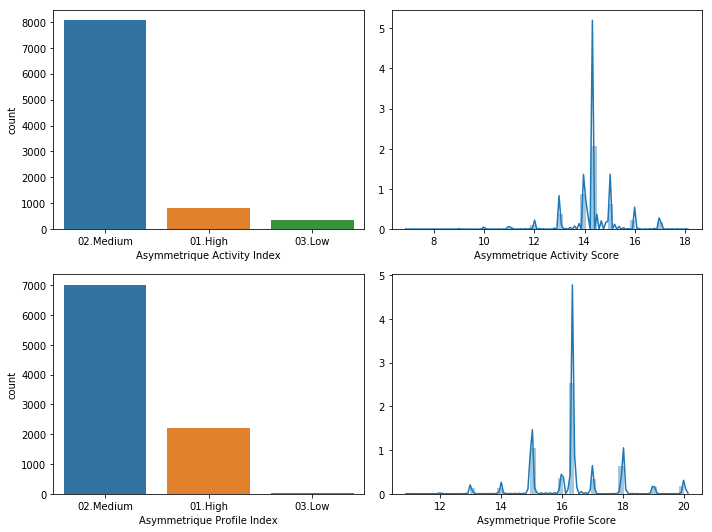

In [13]:
#'Asymmetrique Activity Score','Asymmetrique Profile Score'are normally distributed let's impute them with mean.
lead_data['Asymmetrique Activity Score']=lead_data['Asymmetrique Activity Score'].fillna(lead_data['Asymmetrique Activity Score'].mean())
lead_data['Asymmetrique Profile Score']=lead_data['Asymmetrique Profile Score'].fillna(lead_data['Asymmetrique Profile Score'].mean())

# Impute missing categorical features 'Asymmetrique Activity Index','Asymmetrique Profile Index' with their mode.
lead_data[['Asymmetrique Activity Index','Asymmetrique Profile Index']]=lead_data[['Asymmetrique Activity Index','Asymmetrique Profile Index']].fillna('02.Medium')

# Let's check the distribution of these variables again after imputing missing values 
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.distplot(lead_data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.distplot(lead_data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

#### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

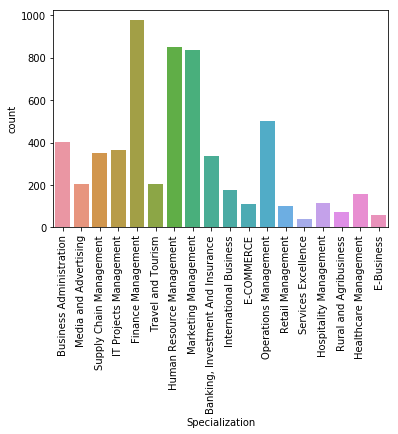

In [14]:
# 36% missing values
#lets's first see column distribution
sns.countplot(lead_data.Specialization)
xticks(rotation = 90)

In [15]:
# It might be the case that lead has not entered any specialization if his/her option is not availabe in the list. Hence we can make a category "Others" for missing values.
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

#### Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

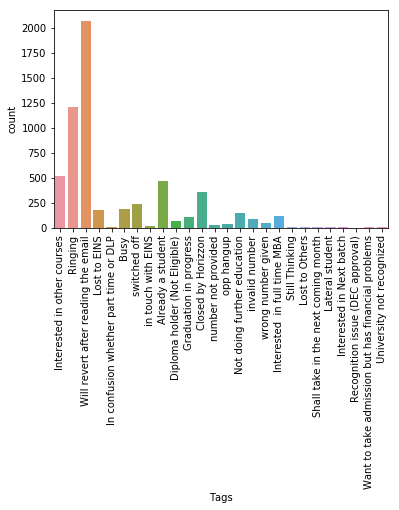

In [16]:
sns.countplot(lead_data.Tags)
xticks(rotation = 90)

In [17]:
# For column'Tags' null values might be because employee might not have found any special note to attach for that customer, hence we can make a category 'No tag'
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'No Tag')

#### What is your current occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

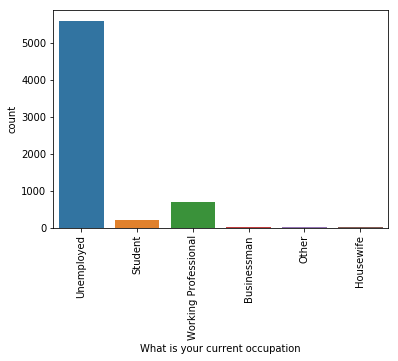

In [18]:
sns.countplot(lead_data['What is your current occupation'])
xticks(rotation = 90)

In [19]:
# we can impute current occupation missing values with most frequent value that is Unemployed.

lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')


In [20]:
# Now we are left with less than 5% of missing values lets remove those rows 
lead_data=lead_data.dropna(axis=0,subset=['TotalVisits','Page Views Per Visit','Last Activity','Lead Source'])

# again check % of missing values in each column
((lead_data.isna().mean()*100).round(2)).sort_values(ascending=False)


Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Tags                                      0.0
Asymmetrique Activity Index               0.0
Asymmetrique Profile Index                0.0
Asymmetrique Activity Score               0.0
Asymmetrique Profile Score                0.0
Lead Origin                               0.0
dtype: float64

In [21]:
lead_data.shape

(9074, 18)

initially we had 9240 records now we left with 9074 records Now we don't have any missing values

## Convert datatypes

In [22]:
lead_data.TotalVisits = lead_data.TotalVisits.astype(int)
lead_data['Page Views Per Visit']=lead_data['Page Views Per Visit'].astype(int)
lead_data['Asymmetrique Activity Score']=lead_data['Asymmetrique Activity Score'].astype(int)
lead_data['Asymmetrique Profile Score']=lead_data['Asymmetrique Profile Score'].astype(int)

lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Others,Unemployed,No,Interested in other courses,02.Medium,02.Medium,15,15,No,Modified
1,API,Organic Search,No,0,5,674,2,Email Opened,Others,Unemployed,No,Ringing,02.Medium,02.Medium,15,15,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Student,No,Will revert after reading the email,02.Medium,01.High,14,20,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Unemployed,No,Ringing,02.Medium,01.High,13,17,No,Modified
4,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Others,Unemployed,No,Will revert after reading the email,02.Medium,01.High,15,18,No,Modified


## Data Preperation

Converting some binary variables (Yes/No) to 0/1

In [23]:
# List of variables to map
varlist=['Do Not Email','Search','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [24]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Others,Unemployed,0,Interested in other courses,02.Medium,02.Medium,15,15,0,Modified
1,API,Organic Search,0,0,5,674,2,Email Opened,Others,Unemployed,0,Ringing,02.Medium,02.Medium,15,15,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Student,0,Will revert after reading the email,02.Medium,01.High,14,20,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,Unreachable,Media and Advertising,Unemployed,0,Ringing,02.Medium,01.High,13,17,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,Others,Unemployed,0,Will revert after reading the email,02.Medium,01.High,15,18,0,Modified


#### Creating Dummy Variables

In [25]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity']], drop_first=True)


# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [26]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tag,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Others,Unemployed,0,Interested in other courses,02.Medium,02.Medium,15,15,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0

In [27]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], 1)

In [28]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tag,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,15,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2,0,15,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

## Test-Train Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tag,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,15,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5,674,2,0,15,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,

In [31]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_No Tag,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.284595,-0.160255,-0.145924,0,-0.159171,-0.134368,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.145924,0,-1.132123,1.365405,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [35]:
### Checking the Conversion Rate
leadConversion = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
leadConversion

37.85541106458012

Right now we have almost 37% conversion rate that we need to increase upto 80%

## Looking at Correlations

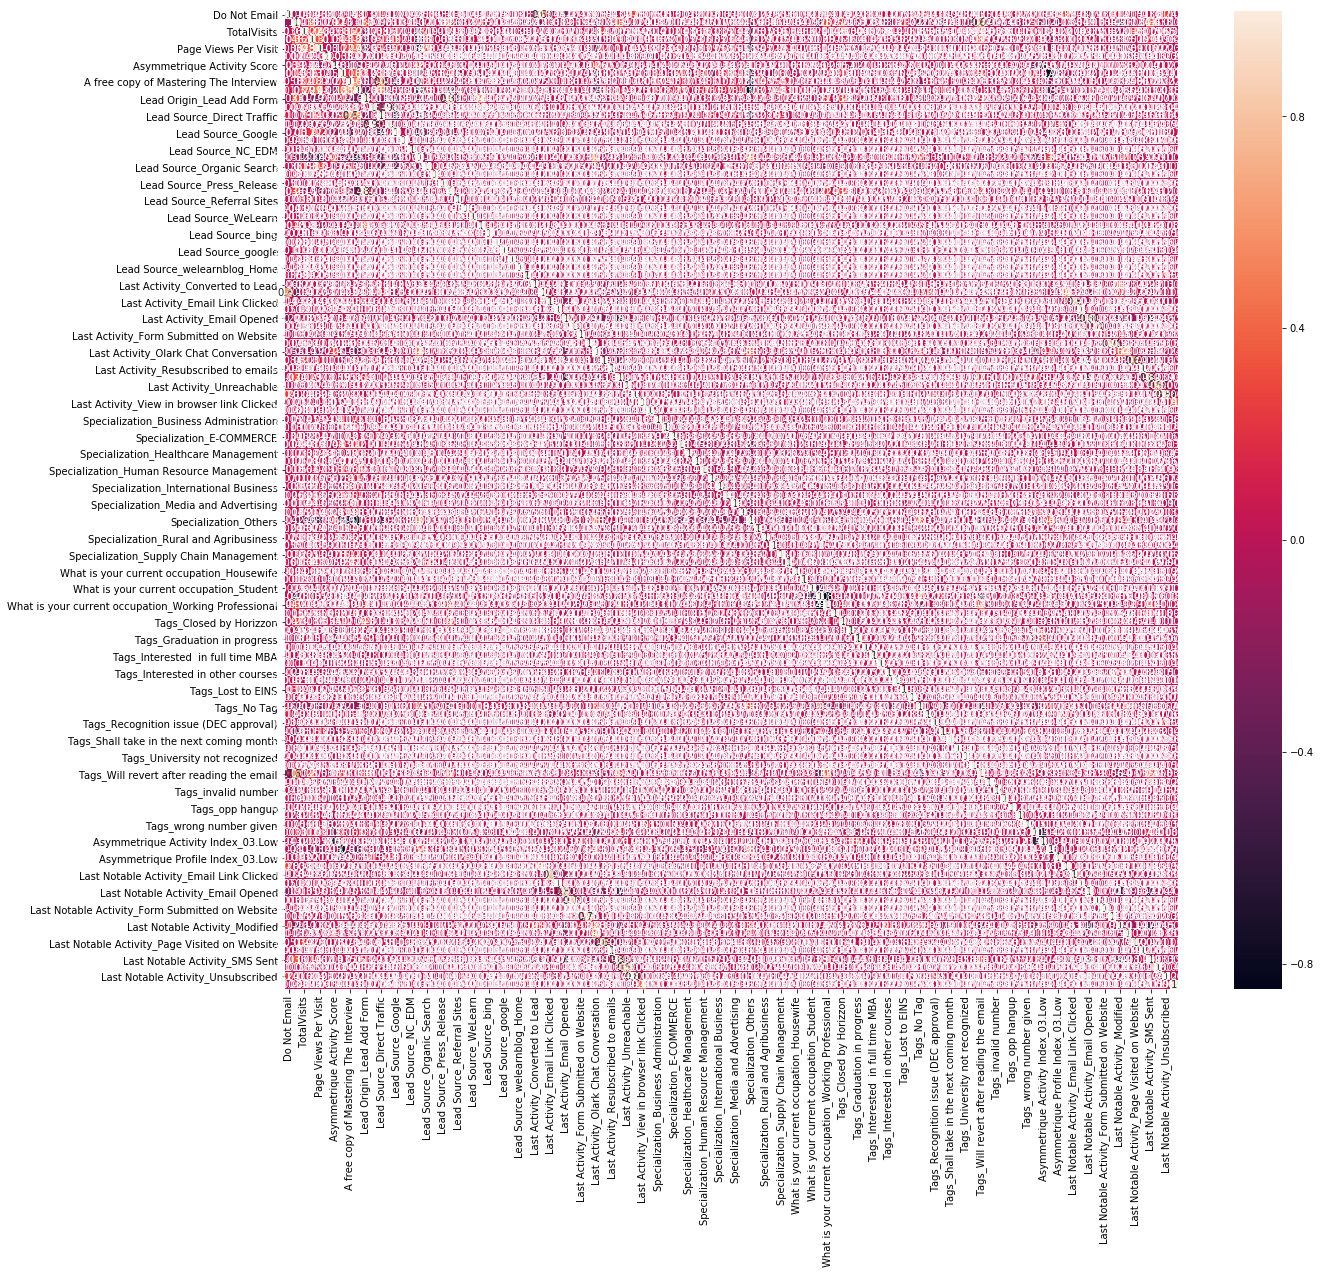

In [36]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,18))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

##  Model Building

Running Your First Training Model

In [37]:
import statsmodels.api as sm

In [38]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                          112
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.8
Date:                Mon, 26 Aug 2019   Deviance:                       2023.6
Time:                        15:52:40   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     19.7270   2.15e+05   9.17e-05      1.000   -4.22e+05    4.22e+05
Do Not Email                                              -1.3831      0.376     -3.674      0.000      -2.121      -0.645
TotalVisits                                                0.1505      0.039      3.851      0.000       0.074       0.227
Total Time Spent on Website                                1.2135      0.073     16.725      0.000       1.071       1.356
Page Views Per Visit                                      -0.0859      0.080     -1.077      0.281      -0.242       0.070
Search                                                    -1.7425      3.297     -0.528      0.597      -8.205       4.720
Asymmetrique Activity Score                                1.4435      0.142     10.151      0.000       1.165       1.722
Asymmetrique Profile Score                                 0.3185      0.145      2.191      0.028       0.034       0.603
A free copy of Mastering The Interview                    -0.2443      0.204     -1.200      0.230      -0.643       0.155
Lead Origin_Landing Page Submission                       -1.1685      0.281     -4.161      0.000      -1.719      -0.618
Lead Origin_Lead Add Form                                 -3.7692      6.923     -0.544      0.586     -17.339       9.800
Lead Origin_Lead Import                                   28.0443   2.17e+05      0.000      1.000   -4.25e+05    4.25e+05
Lead Source_Direct Traffic                                -3.8130      7.423     -0.514      0.607     -18.362      10.736
Lead Source_Facebook                                     -30.2115   2.17e+05     -0.000      1.000   -4.25e+05    4.25e+05
Lead Source_Google                                        -3.7653      7.421     -0.507      0.612     -18.310      10.780
Lead Source_Live Chat                                     19.8508   1.49e+05      0.000      1.000   -2.93e+05    2.93e+05
Lead Source_NC_EDM                                        22.8274   2.16e+05      0.000      1.000   -4.22e+05    4.23e+05
Lead Source_Olark Chat                                    -3.0813      7.416     -0.415      0.678     -17.617      11.454
Lead Source_Organic Search                                -4.1088      7.423     -0.554      0.580     -18.658      10.440
Lead Source_Pay per Click Ads                            -22.9495   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -27.6766   2.16e+05     -0.000      1.000   -4.24e+05    4.24e+05
Lead Source_Reference                                      0.5919      2.699      0.219      0.826      -4.698       5.882
Lead Source_Referral Sites                                -3.2058      7.444     -0.431

many features in the model are having high p value i.e. many of them are insignificant. So we need to take few of the significants one. Lets use RFE for this purpose

## Feature Selection Using RFE

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [41]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False])

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 69),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 76),
 ('Search', False, 65),
 ('Asymmetrique Activity Score', False, 7),
 ('Asymmetrique Profile Score', False, 57),
 ('A free copy of Mastering The Interview', False, 59),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 99),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', False, 84),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 97),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 87),
 ('Lead Source_WeLearn', False, 101),
 ('Lead Source_Welingak Webs

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email 

Assessing the model with StatsModels

In [45]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1339.9
Date:                Mon, 26 Aug 2019   Deviance:                       2679.9
Time:                        15:52:50   Pearson chi2:                 1.15e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9653      0.186    -15.914      0.000      -3.330      -2.600
Do Not Email                                -1.2189      0.249     -4.887      0.000      -1.708      -0.730
Lead Source_Welingak Website                 4.5803      0.742      6.175      0.000       3.127       6.034
Last Activity_SMS Sent                       1.3620      0.218      6.253      0.000       0.935       1.789
Tags_Busy                                    2.0495      0.294      6.961      0.000       1.472       2.627
Tags_Closed by Horizzon                      8.4883      0.739     11.490      0.000       7.040       9.936
Tags_Lost to EINS                            8.0844      0.757     10.675      0.000       6.600       9.569
Tags_No Tag                                  1.6210      0.189      8.562      0.000       1.250       1.992
Tags_Ringing                                -2.0900      0.303     -6.888      0.000      -2.685      -1.495
Tags_Will revert after reading the email     6.5132      0.253     25.745      0.000       6.017       7.009
Tags_invalid number                        -22.7076   1.49e+04     -0.002      0.999   -2.91e+04    2.91e+04
Tags_switched off                           -2.1424      0.552     -3.878      0.000      -3.225      -1.060
Tags_wrong number given                    -22.5349   2.03e+04     -0.001      0.999   -3.97e+04    3.97e+04
Asymmetrique Activity Index_03.Low          -1.8455      0.443     -4.167      0.000      -2.714      -0.977
Last Notable Activity_Modified              -1.3767      0.151     -9.125      0.000      -1.672      -1.081
Last Notable Activity_SMS Sent               1.1315      0.252      4.488      0.000       0.637       1.626
============================================================================================================
"""

### Checking VIFs

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.15
2,Last Activity_SMS Sent,5.95
13,Last Notable Activity_Modified,1.75
6,Tags_No Tag,1.46
8,Tags_Will revert after reading the email,1.44
7,Tags_Ringing,1.16
0,Do Not Email,1.12
1,Lead Source_Welingak Website,1.05
3,Tags_Busy,1.05
4,Tags_Closed by Horizzon,1.05


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Last Notable Activity_SMS Sent' has the highest VIF. So let's start by dropping that.

In [48]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_No Tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified'],
      dtype='object')

In [49]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1350.2
Date:                Mon, 26 Aug 2019   Deviance:                       2700.4
Time:                        15:52:55   Pearson chi2:                 1.24e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8593      0.182    -15.679      0.000      -3.217      -2.502
Do Not Email                                -1.1975      0.250     -4.789      0.000      -1.688      -0.707
Lead Source_Welingak Website                 4.5086      0.741      6.085      0.000       3.056       5.961
Last Activity_SMS Sent                       2.2026      0.111     19.816      0.000       1.985       2.420
Tags_Busy                                    2.0664      0.287      7.207      0.000       1.504       2.628
Tags_Closed by Horizzon                      8.7371      0.740     11.813      0.000       7.287      10.187
Tags_Lost to EINS                            8.3098      0.761     10.919      0.000       6.818       9.801
Tags_No Tag                                  1.5952      0.188      8.508      0.000       1.228       1.963
Tags_Ringing                                -1.9536      0.299     -6.531      0.000      -2.540      -1.367
Tags_Will revert after reading the email     6.5937      0.255     25.852      0.000       6.094       7.094
Tags_invalid number                        -22.5774    1.5e+04     -0.002      0.999   -2.95e+04    2.95e+04
Tags_switched off                           -1.9931      0.549     -3.628      0.000      -3.070      -0.916
Tags_wrong number given                    -22.4206   2.05e+04     -0.001      0.999   -4.02e+04    4.01e+04
Asymmetrique Activity Index_03.Low          -1.8483      0.451     -4.103      0.000      -2.731      -0.965
Last Notable Activity_Modified              -1.8263      0.125    -14.645      0.000      -2.071      -1.582
============================================================================================================
"""

Variables 'Tags_invalid number','Tags_wrong number given' have very high p value. they are insignificant let's drop them

In [50]:
col = col.drop(['Tags_invalid number','Tags_wrong number given'], 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_No Tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified'],
      dtype='object')

In [51]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1361.1
Date:                Mon, 26 Aug 2019   Deviance:                       2722.2
Time:                        15:52:58   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1442      0.185    -17.026      0.000      -3.506      -2.782
Do Not Email                                -1.2027      0.248     -4.852      0.000      -1.689      -0.717
Lead Source_Welingak Website                 4.5004      0.740      6.081      0.000       3.050       5.951
Last Activity_SMS Sent                       2.1420      0.109     19.597      0.000       1.928       2.356
Tags_Busy                                    2.3847      0.284      8.401      0.000       1.828       2.941
Tags_Closed by Horizzon                      8.9928      0.741     12.137      0.000       7.541      10.445
Tags_Lost to EINS                            8.5619      0.762     11.238      0.000       7.069      10.055
Tags_No Tag                                  1.8949      0.188     10.100      0.000       1.527       2.263
Tags_Ringing                                -1.6190      0.296     -5.475      0.000      -2.199      -1.039
Tags_Will revert after reading the email     6.8666      0.257     26.686      0.000       6.362       7.371
Tags_switched off                           -1.6553      0.547     -3.025      0.002      -2.728      -0.583
Asymmetrique Activity Index_03.Low          -1.8264      0.452     -4.043      0.000      -2.712      -0.941
Last Notable Activity_Modified              -1.7914      0.124    -14.427      0.000      -2.035      -1.548
============================================================================================================
"""

In [52]:
# checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_SMS Sent,1.65
11,Last Notable Activity_Modified,1.43
6,Tags_No Tag,1.42
8,Tags_Will revert after reading the email,1.36
7,Tags_Ringing,1.13
0,Do Not Email,1.11
1,Lead Source_Welingak Website,1.05
3,Tags_Busy,1.05
4,Tags_Closed by Horizzon,1.05
9,Tags_switched off,1.04


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [53]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.222831
1012    0.079295
9226    0.011979
4750    0.709464
7987    0.996885
1281    0.997169
2880    0.222831
4971    0.799397
7536    0.976396
1248    0.011979
dtype: float64

In [54]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22283142, 0.07929542, 0.01197919, 0.70946401, 0.99688478,
       0.99716948, 0.22283142, 0.79939739, 0.97639566, 0.01197919])

##### Creating a dataframe with the actual Lead conversion tag and the predicted probabilities¶

In [55]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID
0,0,0.222831,3009
1,0,0.079295,1012
2,0,0.011979,9226
3,1,0.709464,4750
4,1,0.996885,7987


Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [56]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,predicted
0,0,0.222831,3009,0
1,0,0.079295,1012,0
2,0,0.011979,9226,0
3,1,0.709464,4750,1
4,1,0.996885,7987,1


In [57]:
from sklearn import metrics

In [58]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3772  133]
 [ 339 2107]]


In [59]:
# Predicted     not_converted    converted
# Actual
# not_conveted        3772      133
# converted           339       2107 

In [60]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9256809951188789


#### Metrics beyond simply accuracy

In [61]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8614063777596075

In [63]:
# Let us calculate specificity
TN / float(TN+FP)

0.9659411011523688

In [64]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.03405889884763124


In [65]:
# positive predictive value 
print (TP / float(TP+FP))

0.940625


In [66]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9175383118462661


### Plotting the ROC Curve

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

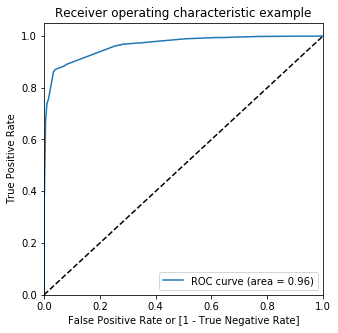

In [69]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.222831,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.079295,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011979,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.709464,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.996885,7987,1,1,1,1,1,1,1,1,1,1,1


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.824122  0.962796  0.737260
0.2   0.2  0.827586  0.962388  0.743150
0.3   0.3  0.924579  0.871627  0.957746
0.4   0.4  0.925524  0.864677  0.963636
0.5   0.5  0.925681  0.861406  0.965941
0.6   0.6  0.925366  0.860180  0.966197
0.7   0.7  0.925524  0.860180  0.966453
0.8   0.8  0.893088  0.738348  0.990013
0.9   0.9  0.875138  0.686427  0.993342


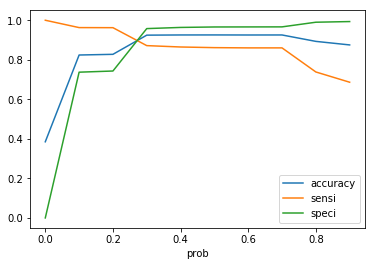

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [73]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.222831,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.079295,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.011979,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.709464,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.996885,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [74]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9245788064871674

In [75]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3740,  165],
       [ 314, 2132]], dtype=int64)

In [76]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8716271463614064

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.9577464788732394

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04225352112676056


In [80]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9281671745755333


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9225456339417859


## Making predictions on the test set

In [82]:
X_test = X_test[col]
X_test.head(10)

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Asymmetrique Activity Index_03.Low,Last Notable Activity_Modified
3271,0,0,0,0,0,0,1,0,0,0,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,0,0,0,0,0,1,0,0,0,0,0
4216,0,0,0,0,1,0,0,0,0,0,0,1
3830,0,0,0,0,0,0,1,0,0,0,0,0
1800,0,0,0,0,0,0,0,0,1,0,0,0
6507,0,0,1,0,0,0,0,1,0,0,0,0
4821,0,0,0,0,0,0,0,0,0,1,0,0
4223,0,0,1,0,0,0,0,0,1,0,0,0
4714,0,0,1,0,0,0,1,0,0,0,0,1


In [83]:
X_test_sm = sm.add_constant(X_test)

In [84]:
y_test_pred = res.predict(X_test_sm)

In [85]:
y_test_pred[:10]

3271    0.222831
1490    0.976396
7936    0.222831
4216    0.982998
3830    0.222831
1800    0.976396
6507    0.067790
4821    0.008167
4223    0.997169
4714    0.289336
dtype: float64

In [86]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()


,0
3271,0.222831
1490,0.976396
7936,0.222831
4216,0.982998
3830,0.222831


In [87]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

,Converted,CustID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [88]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [89]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [90]:
y_pred_final.head()


,Converted,CustID,0
0,0,3271,0.222831
1,1,1490,0.976396
2,0,7936,0.222831
3,1,4216,0.982998
4,0,3830,0.222831


In [91]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [92]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conversion_Prob'], axis=1)


In [93]:
y_pred_final.head(10)

,CustID,Converted,Conversion_Prob
0,3271,0,0.222831
1,1490,1,0.976396
2,7936,0,0.222831
3,4216,1,0.982998
4,3830,0,0.222831
5,1800,1,0.976396
6,6507,0,0.067790
7,4821,0,0.008167
8,4223,1,0.997169
9,4714,0,0.289336


In [94]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head(10)

,CustID,Converted,Conversion_Prob,final_predicted
0,3271,0,0.222831,0
1,1490,1,0.976396,1
2,7936,0,0.222831,0
3,4216,1,0.982998,1
4,3830,0,0.222831,0
5,1800,1,0.976396,1
6,6507,0,0.067790,0
7,4821,0,0.008167,0
8,4223,1,0.997169,1
9,4714,0,0.289336,0


In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9173705471905986

In [96]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)

[[1664   70]
 [ 155  834]]


In [97]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8432760364004045

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.9596309111880046

On both train and test data model's accuracy, sensitivity and specificity are comparable.  Model is satisfactory.

### Assigning Lead Score

In [100]:
y_pred_final['Lead Score']=(y_pred_final.Conversion_Prob*100).round()
y_pred_final['Lead Score']=y_pred_final['Lead Score'].astype(int)
y_pred_final.head()

,CustID,Converted,Conversion_Prob,final_predicted,Lead Score
0,3271,0,0.222831,0,22
1,1490,1,0.976396,1,98
2,7936,0,0.222831,0,22
3,4216,1,0.982998,1,98
4,3830,0,0.222831,0,22
